In [1]:
# K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

## IMPORT STATEMENTS

In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,roc_curve


In [5]:
nba = pd.DataFrame(pd.read_csv("nba_2013.csv"))

In [6]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

## Data Exploration

In [7]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [8]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


## Data Pre-processing

In [12]:
nba_filtered = nba.dropna()

In [14]:
nba_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 480
Data columns (total 31 columns):
player          403 non-null object
pos             403 non-null object
age             403 non-null int64
bref_team_id    403 non-null object
g               403 non-null int64
gs              403 non-null int64
mp              403 non-null int64
fg              403 non-null int64
fga             403 non-null int64
fg.             403 non-null float64
x3p             403 non-null int64
x3pa            403 non-null int64
x3p.            403 non-null float64
x2p             403 non-null int64
x2pa            403 non-null int64
x2p.            403 non-null float64
efg.            403 non-null float64
ft              403 non-null int64
fta             403 non-null int64
ft.             403 non-null float64
orb             403 non-null int64
drb             403 non-null int64
trb             403 non-null int64
ast             403 non-null int64
stl             403 non-null int64
blk    

In [40]:
X = nba_filtered.drop(['season','player','pos','pts','bref_team_id'],axis=1)
y = nba_filtered['pts']


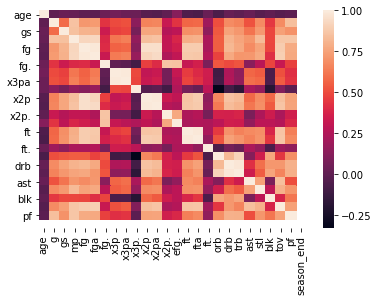

In [41]:
sns.heatmap(X.corr())

## Train Test Data Set

In [42]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.3,random_state=101)

## Creating and Training the Model

In [48]:
params = {'n_neighbors':[1,2,3,4,5]          
         }

knn = KNeighborsRegressor()

In [49]:
model =  GridSearchCV(knn,params)

In [50]:
model.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [51]:
# Single best score achieved across all params (min_samples_split)
print(model.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(model.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(model.best_estimator_)

0.9597075737518282
{'n_neighbors': 3}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')


In [53]:
best_model =  model.best_estimator_
predicted = best_model.predict(X_test)


In [61]:
print('MAE:', mean_absolute_error(y_test, predicted))
print('MSE:', mean_squared_error(y_test, predicted))
print('RMSE:',np.sqrt(mean_squared_error(y_test, predicted)))

MAE: 64.19008264462809
MSE: 9526.032139577595
RMSE: 97.6013941477149


In [62]:
best_model.score(X_test,y_test)

0.9581997635339751